# PROYECTO TEAMSIGHT, CÁLCULO DEL ATTRITION
# (Sección de Machine Learning)

## Adrián Chacón Candia
## BIMEX Analytics

# ESQUEMA SECCIÓ MACHINE LEARNING

1. Fer un Random Forest o Extreme Radiance Boosting per a mirar la dificultat del problema (F1 Score).
    1. Inicialment no fer cap modificació a les dades. Només categoritzar les de resposta múltiple (que no tenen significat de valor) amb Dummy Variables/One-Hot Encoding.
2. Al veure els resultats i mirar F1 Score determinar com seguir.
    1. Si el resultat és bo: -
    2. Si el resultat és dolent: **El resultat és dolent F1 Score = 0.3**
3. Millorar el codi
    1. Balancing
    2. K-Folds/Altres?
4. Corves Recall/Accuracy?

# COSES A TENIR EN COMPTE

- **CORVES RECALL/ACCURACY**
    - Volem optimitzar el ML (potser no tant alt l'accuracy per a reduïr el nombre de persones)   
    
## COSES A DEMANAR/IDEES PER A LA "SEGONA PART" (FER QÜESTIONARI)
1. Millora de preguntes (general).
2. Preguntes obertes per a poder escriure. Saber si el missatge de la persona és (positiu/neutre/negatiu).

# REWIND ACTUAL

Actualment ja he realitzat el primer Machine Learning amb el métode Random Forest (ademés de implementar el One-Hot Encoding a variables categóriques) per a tenir una primera idea de la dificultat del problema. Els resultats no han sigut del tot positius ja que el valor del F1 Score ha sigut una mica pobre (F1 Score = 0.3). Ara toca tornar a modelitzar un millor Machine Learning.

# DUBTES

- Estudio por departamentos
- Que alguien no pese demasiado

# COSES PER A FER

**Parlar amb l'Oriol com millorar el codi per a tenir un millor F1 Score**

# ÍNDEX

1. [Load the data](#1)
2. [Random Forest](#2)
    1. [One-Hot Encoding](#2.1)
    2. [Random Forest code](#2.2)
        1. [Random Forest code from Oriol](#2.2.1)
        2. [Random Forest personal code](#2.2.2)
3. [Evaluation Random Forest](#3)
    1. [Test/Train Split](#3.1)
    2. [Test/Train Split Evaluation](#3.2)
4. [Improvement Random Forest](#4)
    1. [Balancing Data](#4.1)
        1. [Balancing Evaluation](#4.1.1)

# ÍNDEX UTILITATS
- [llista_categories](#a)
- [dic_responses_of_category](#b)
- [confusion matrix](#c)
- [values of machine learning](#d)
- [on guardar imatges](#e)
- [ATTRITION](#f)

## 1. Load the data <a class="anchor" id="1"></a>

In [3]:
import pandas as pd

data = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
data.Attrition.value_counts()
print('%ATTRITION')
237/(1233+237)

%ATTRITION


0.16122448979591836

In [5]:
#voy a cambiar los valores de ATTRITION: Yes,No a los valores Yes:1, No:0
data_n = data
data_n = data_n.set_index('Attrition')
data_n = data_n.rename({"Yes":1,"No":0})
data_n = data_n.reset_index()
data_n = data_n.set_index('Gender')
data_n = data_n.rename({"Male":1,"Female":-1})
data_n = data_n.reset_index()
data_n = data_n.set_index('OverTime')
data_n = data_n.rename({"Yes":1,"No":0})
data_n = data_n.reset_index()
data_n = data_n.set_index('BusinessTravel')
data_n = data_n.rename({"Non-Travel":0,"Travel_Rarely":0.5,"Travel_Frequently":1})
data_n = data_n.reset_index()
#sí coherente Marital_Status?
data_n = data_n.set_index('MaritalStatus')
data_n = data_n.rename({"Single":0,"Divorced":0.5,"Married":1})
data_n = data_n.reset_index()
#clear nonrelevant data
data_n = data_n.drop(columns=['EmployeeCount','StandardHours','Over18'])

data_n

,MaritalStatus,BusinessTravel,OverTime,Gender,Attrition,Age,DailyRate,Department,DistanceFromHome,Education,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.5,1,-1,1,41,1102,Sales,1,2,...,3,1,0,8,0,1,6,4,0,5
1,1.0,1.0,0,1,0,49,279,Research & Development,8,1,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.5,1,1,1,37,1373,Research & Development,2,2,...,3,2,0,7,3,3,0,0,0,0
3,1.0,1.0,1,-1,0,33,1392,Research & Development,3,4,...,3,3,0,8,3,3,8,7,3,0
4,1.0,0.5,0,1,0,27,591,Research & Development,2,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,1.0,0,1,0,36,884,Research & Development,23,2,...,3,3,1,17,3,3,5,2,0,3
1466,1.0,0.5,0,1,0,39,613,Research & Development,6,1,...,3,1,1,9,5,3,7,7,1,7
1467,1.0,0.5,1,1,0,27,155,Research & Development,4,3,...,4,2,1,6,0,3,6,2,0,3
1468,1.0,1.0,0,1,0,49,1023,Sales,2,3,...,3,4,0,17,3,2,9,6,0,8


## 2. Random Forest <a class="anchor" id="2"></a>

### 2.1 One-Hot Encoding <a class="anchor" id="2.1"></a>

Primero vuelvo todo el dataframe numérico volviendo todas las variables de categorías a valores con el *One-Hot Encoding* (si hay respuesta A,B y C hago 3 variables: A Sí/No, etc.).

###### llista_categories <a class="anchor" id="a"></a>

In [6]:
#primero del DataFrame editado miro qué categorías quedan con tipo string.

def llista_categories(DataFrame):
    #función que te da las categorías de un DataFrame en una lista

    llista_categories = [category for category in DataFrame]
    
    return(llista_categories)

In [7]:
lista_cat = llista_categories(data_n)
lista_cat
str_variables = []

for category in lista_cat:
    section = data_n.loc[:,category]
    if type(section[0]) == str:
        str_variables.append(category)
        
str_variables

['Department', 'EducationField', 'JobRole']

###### dic_responses_of_category <a class="anchor" id="b"></a>

In [8]:
def dic_responses_of_category(DataFrame):
    #función que te da en formato de diccionario las posibles respuestas 
    #de cada categoría de un DataFrame dado
    #NECESARIO HABER COMPILADO LA FUNCIÓN: "llista_categories"
    
    list_variables = llista_categories(DataFrame)
    
    possible_answers = {}

    for category in list_variables:
        responses = DataFrame.loc[:,category].value_counts()
        answers = responses.index
        possible_answers[category] = list(answers)

    return(possible_answers)

In [9]:
possible_answers = {}

for category in str_variables:
    responses = data_n.loc[:,category].value_counts()
    answers = responses.index
    possible_answers[category] = list(answers)

possible_answers

{'Department': ['Research & Development', 'Sales', 'Human Resources'],
 'EducationField': ['Life Sciences',
  'Medical',
  'Marketing',
  'Technical Degree',
  'Other',
  'Human Resources'],
 'JobRole': ['Sales Executive',
  'Research Scientist',
  'Laboratory Technician',
  'Manufacturing Director',
  'Healthcare Representative',
  'Manager',
  'Sales Representative',
  'Research Director',
  'Human Resources']}

Ahora que ya tenemos todas las categorías que no tenían respuestas numéricas ya se pueden añadir nuevas variables al DataFrame y volverlas Booleanas.

In [10]:
data_OHE = data_n.loc[:,str_variables]
data_OHE = pd.merge(data_n.loc[:,'EmployeeNumber'], data_OHE, left_index=True, right_index=True)
data_OHE

,EmployeeNumber,Department,EducationField,JobRole
0,1,Sales,Life Sciences,Sales Executive
1,2,Research & Development,Life Sciences,Research Scientist
2,4,Research & Development,Other,Laboratory Technician
3,5,Research & Development,Life Sciences,Research Scientist
4,7,Research & Development,Medical,Laboratory Technician
...,...,...,...,...
1465,2061,Research & Development,Medical,Laboratory Technician
1466,2062,Research & Development,Medical,Healthcare Representative
1467,2064,Research & Development,Life Sciences,Manufacturing Director
1468,2065,Sales,Medical,Sales Executive


In [11]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(data_OHE[str_variables]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = data_OHE.join(encoder_df)

#view final df
final_df

,EmployeeNumber,Department,EducationField,JobRole,0,1,2,3,4,5,...,8,9,10,11,12,13,14,15,16,17
0,1,Sales,Life Sciences,Sales Executive,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,Research & Development,Life Sciences,Research Scientist,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4,Research & Development,Other,Laboratory Technician,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,Research & Development,Life Sciences,Research Scientist,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7,Research & Development,Medical,Laboratory Technician,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,Research & Development,Medical,Laboratory Technician,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,2062,Research & Development,Medical,Healthcare Representative,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,2064,Research & Development,Life Sciences,Manufacturing Director,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1468,2065,Sales,Medical,Sales Executive,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
a = final_df.loc[final_df[15] == 1,'Department']
a.value_counts()
a
final_df.loc[final_df[15]==1]

,EmployeeNumber,Department,EducationField,JobRole,0,1,2,3,4,5,...,8,9,10,11,12,13,14,15,16,17
1,2,Research & Development,Life Sciences,Research Scientist,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,Research & Development,Life Sciences,Research Scientist,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12,16,Research & Development,Life Sciences,Research Scientist,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16,21,Research & Development,Life Sciences,Research Scientist,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19,24,Research & Development,Life Sciences,Research Scientist,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2038,Research & Development,Technical Degree,Research Scientist,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1455,2048,Research & Development,Life Sciences,Research Scientist,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1457,2051,Research & Development,Medical,Research Scientist,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1458,2052,Research & Development,Life Sciences,Research Scientist,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
possible_answers
final_df.loc[final_df[9] == 1,'EducationField'].value_counts()

Life Sciences       60
Medical             48
Technical Degree    14
Other                9
Name: EducationField, dtype: int64

In [14]:
#we get how to rename each category in the OHE
renaming = ['EmployeeNumber']

for i in range(0,18):
    a = final_df.loc[final_df[i] == 1,'Department']
    b = final_df.loc[final_df[i] == 1,'EducationField']
    c = final_df.loc[final_df[i] == 1,'JobRole']
    
    if i in range(0,len(possible_answers['Department'])):
        renaming.append(a.iloc[0])
        #print('a')
    elif i in range(len(possible_answers['Department']),len(possible_answers['Department'])+len(possible_answers['EducationField'])):
        renaming.append(b.iloc[0])
        #print('b')
    else:
        renaming.append(c.iloc[0])
        #print('c')
    
#final_df.loc[79]
renaming

['EmployeeNumber',
 'Human Resources',
 'Research & Development',
 'Sales',
 'Human Resources',
 'Life Sciences',
 'Marketing',
 'Medical',
 'Other',
 'Technical Degree',
 'Healthcare Representative',
 'Human Resources',
 'Laboratory Technician',
 'Manager',
 'Manufacturing Director',
 'Research Director',
 'Research Scientist',
 'Sales Executive',
 'Sales Representative']

In [15]:
#drop column with str
final_df.drop(str_variables, axis=1, inplace=True)

final_df.columns = [renaming]
#renaming_dic = {}
#for i in range(0,18):
 #   renaming_dic[i] = renaming[i+1][0]
#final_df = final_df.rename(columns=renaming_dic)

final_df
#renaming_dic

,EmployeeNumber,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,2062,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,2064,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1468,2065,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
llista_final = llista_categories(final_df)
llista_data = llista_categories(data_n.drop(columns=str_variables))
print(llista_final,llista_data)

[('EmployeeNumber',), ('Human Resources',), ('Research & Development',), ('Sales',), ('Human Resources',), ('Life Sciences',), ('Marketing',), ('Medical',), ('Other',), ('Technical Degree',), ('Healthcare Representative',), ('Human Resources',), ('Laboratory Technician',), ('Manager',), ('Manufacturing Director',), ('Research Director',), ('Research Scientist',), ('Sales Executive',), ('Sales Representative',)] ['MaritalStatus', 'BusinessTravel', 'OverTime', 'Gender', 'Attrition', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [17]:
llista_final_corregida = []
for i in llista_final:
    for j in i:
        llista_final_corregida.append(j)
llista_final_corregida
final_df.columns = llista_final_corregida
final_df

,EmployeeNumber,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,2062,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,2064,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1468,2065,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
for i in final_df:
    print(i)

EmployeeNumber
Human Resources
Research & Development
Sales
Human Resources
Life Sciences
Marketing
Medical
Other
Technical Degree
Healthcare Representative
Human Resources
Laboratory Technician
Manager
Manufacturing Director
Research Director
Research Scientist
Sales Executive
Sales Representative


In [19]:
#data_OHE = pd.merge(data_n.drop(columns=str_variables), final_df, left_index=True, right_index=True)
#data_OHE = pd.merge(data_n.drop(columns=str_variables), final_df, on='EmployeeNumber')

#hace un mal merge, lo corregimos


#quitamos columna duplicada
#data_OHE = data_OHE.drop(columns='EmployeeNumber')
#data_OHE

# THE GOOD VERSON OF data_OHE

In [20]:
data_OHE = pd.merge(data_n.drop(columns=str_variables), final_df, left_index=True, right_index=True)

data_OHE = data_OHE.drop(columns='EmployeeNumber_x')
data_OHE = data_OHE.rename(columns={'EmployeeNumber_y' : 'EmployeeNumber'})
data_OHE

,MaritalStatus,BusinessTravel,OverTime,Gender,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,...,Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0.0,0.5,1,-1,1,41,1102,1,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0,1,0,49,279,8,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.5,1,1,1,37,1373,2,2,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1,-1,0,33,1392,3,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.5,0,1,0,27,591,2,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,1.0,0,1,0,36,884,23,2,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,1.0,0.5,0,1,0,39,613,6,1,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,1.0,0.5,1,1,0,27,155,4,3,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1468,1.0,1.0,0,1,0,49,1023,2,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
for i in data_OHE:
    print(i)

MaritalStatus
BusinessTravel
OverTime
Gender
Attrition
Age
DailyRate
DistanceFromHome
Education
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
EmployeeNumber
Human Resources
Research & Development
Sales
Human Resources
Life Sciences
Marketing
Medical
Other
Technical Degree
Healthcare Representative
Human Resources
Laboratory Technician
Manager
Manufacturing Director
Research Director
Research Scientist
Sales Executive
Sales Representative


### 2.2 Random Forest code <a class="anchor" id="2.2"></a>

Now that we have the proper DataFrame we can try the Random Forest Machine learning.
This ML will give us a overview of the difficulty of the problem we want to solve.

#### 2.2.1 Random Forest code from Oriol <a class="anchor" id="2.2.1"></a>
# DO NOT COMPILE

In [19]:
%reset -f
from sklearn import tree
import numpy as np
def train_random_forest(X,y,C,F):
    F=int(np.ceil(np.sqrt(X.shape[1])))
    clf_list=[]
    for i in range(C):
        np.random.seed(None)
        idx=np.random.randint(0,y.shape[0],y.shape[0])
        feat_idx=np.random.permutation(np.arange(X.shape[1]))[:F]
        clf = tree.DecisionTreeClassifier(criterion="entropy")
        Xr=X[idx,:].copy()
        Xr=Xr[:,feat_idx]
        yr=y[idx]
        clf_list.append((clf.fit(Xr,yr.ravel()),feat_idx))
    return clf_list


def test_random_forest(X,clf_list):
    yhat=np.zeros((X.shape[0],len(clf_list)))
    i=0
    for dt,feat_idx in clf_list:
        yhat[:,i]=dt.predict(X[:,feat_idx])
        i=i+1
    return np.sign(np.mean(yhat,axis=1)),yhat

In [20]:
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = 2*data[1]-1
print ('Labels: '+ str(np.unique(y)))
features = data[2]
print ('Loading ok.')

FileNotFoundError: [Errno 2] No such file or directory: 'churn_data.pkl'

In [ ]:
from sklearn import metrics
clf_list = train_random_forest(X,y,51,5)
yhat,yk = test_random_forest(X,clf_list)
acc = metrics.accuracy_score(yhat, y)
print (yk.shape)
print (np.sum(np.mean(yk,axis=1)>0))
print (acc)

In [ ]:
#NO SNOOPING
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn import metrics


kf=model_selection.KFold(n_splits=5, shuffle=False)
kf.get_n_splits(X)
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = ensemble.RandomForestClassifier(n_estimators=51)
    dt.fit(X_train,y_train)
    yhat[test_index]=dt.predict(X_test)
    #clf_list = train_random_forest(X_train,y_train,51,np.ceil(np.sqrt(X.shape[1])))
    #yhat[test_index],yk = test_random_forest(X_test,clf_list)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print (acc)
print (np.unique(yhat))
print (np.unique(y_test))
print ('Mean accuracy: '+ str(np.mean(acc)))

In [ ]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm.T)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()
draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

#### 2.2.2 Random Forest personal code <a class="anchor" id="2.2.2"></a>

In [19]:
data_OHE

,MaritalStatus,BusinessTravel,OverTime,Gender,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,...,Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0.0,0.5,1,-1,1,41,1102,1,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0,1,0,49,279,8,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.5,1,1,1,37,1373,2,2,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1,-1,0,33,1392,3,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.5,0,1,0,27,591,2,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,1.0,0,1,0,36,884,23,2,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,1.0,0.5,0,1,0,39,613,6,1,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,1.0,0.5,1,1,0,27,155,4,3,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1468,1.0,1.0,0,1,0,49,1023,2,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
#usually 100 subsets are build

data_OHE.sample(frac = 2/3, replace=True)

,MaritalStatus,BusinessTravel,OverTime,Gender,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,...,Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
1016,0.0,0.5,0,-1,1,31,202,8,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1248,0.0,0.5,0,-1,0,27,1054,8,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
672,0.0,0.5,0,-1,0,42,462,14,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
286,0.5,1.0,1,1,1,44,920,24,3,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1326,0.0,0.5,1,1,1,32,414,2,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,1.0,0.5,0,1,0,22,1230,1,2,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1148,1.0,0.5,0,1,0,39,1387,10,5,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1037,1.0,0.5,1,1,0,45,1448,29,3,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
506,1.0,0.5,0,1,0,37,482,3,3,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
from random import sample
import math

data_OHE.drop(columns=['EmployeeNumber','Attrition'])
sample(set(data_OHE.drop(columns=['EmployeeNumber','Attrition'])),int(math.sqrt(len(data_OHE.columns)-2)+1))

/var/folders/t6/qgf2jdkj243882vkx9f_f2400000gn/T/ipykernel_6267/4168888741.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample(set(data_OHE.drop(columns=['EmployeeNumber','Attrition'])),int(math.sqrt(len(data_OHE.columns)-2)+1))


['Life Sciences',
 'YearsSinceLastPromotion',
 'WorkLifeBalance',
 'DailyRate',
 'Research Director',
 'Medical',
 'YearsInCurrentRole']

In [22]:
from sklearn.ensemble import RandomForestClassifier

bosque = RandomForestClassifier(n_estimators = 100,#n_estimators = nº árboles
                               criterion = "entropy",#la altura de los parámetros en el árbol viene determinado al maximizar la entropía
                               max_features = "sqrt",#papers dicen que nº features es bueno que sea el sqrt
                               bootstrap = True,#proceso para obtener datos = subsets con replace y x featrues
                               max_samples = 2/3,#cúantos datos del DataFrame uso para los árboles
                               oob_score = True)

bosque.fit(data_OHE.drop(columns=['EmployeeNumber','Attrition']).values, data_OHE.Attrition.values)

print(bosque.score(data_OHE.drop(columns=['EmployeeNumber','Attrition']).values, data_OHE.Attrition.values))
print('Accuracy of the model:')
print(bosque.oob_score_)

0.9897959183673469
Accuracy of the model:
0.8585034013605443


KeyError: 4

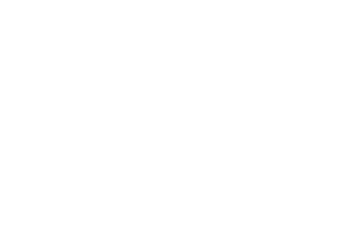

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree

for arbol in bosque.estimators_:
    tree.plot_tree(arbol, feature_names = data_OHE.drop(columns=['EmployeeNumber','Attrition']))
    plt.show()

## 3. Evaluation Random Forest <a class="anchor" id="3"></a>

### 3.1 Test/Train Split  <a class="anchor" id="3.1"></a>

In [28]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

In [29]:
#the DataFrame is data_OHE
# Split dataset into features and target
y = data_OHE['Attrition']
X = data_OHE.drop(['Attrition','EmployeeNumber'], axis=1)

In [30]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

### 3.1 Test/Train Split Evaluation  <a class="anchor" id="3.2"></a>

In [31]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

In [33]:
# View accuracy score
print('Accuracy Score')
accuracy_score(y_test, y_pred_test)

Accuracy Score


0.8586956521739131

###### ATTRITION VALUE  <a class="anchor" id="f"></a>

In [34]:
print('Accuracy is not that great of a value')
attrition = len(data_OHE.loc[data_OHE.Attrition==1])/len(data_OHE)
print('% of attrition in the DataFrame = ',attrition)
print('% no attrition',1-attrition)

Accuracy is not that great of a value
% of attrition in the DataFrame =  0.16122448979591836
% no attrition 0.8387755102040817


In [35]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[305,   4],
       [ 48,  11]])

###### on guardar imatges <a class="anchor" id="e"></a>

In [36]:
#PARA GUARDAR LAS FIGURAS USAR:
figures_path = '/Users/Adrian/Documents/Estudio/Màster/Segundo_Semestre/TFM/Attrition/Figures/'

###### draw_confusion <a class="anchor" id="c"></a>

/var/folders/t6/qgf2jdkj243882vkx9f_f2400000gn/T/ipykernel_6267/3866777582.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
/var/folders/t6/qgf2jdkj243882vkx9f_f2400000gn/T/ipykernel_6267/3866777582.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


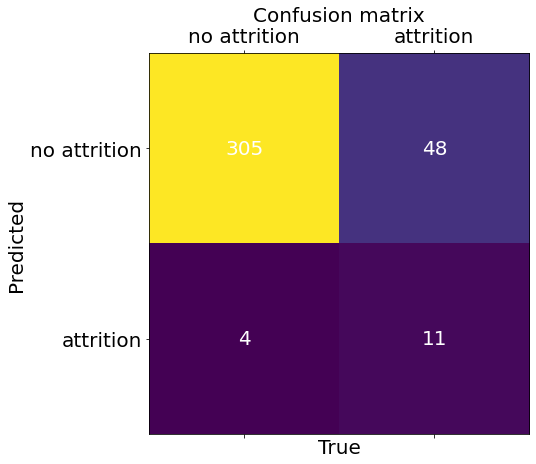

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       309
           1       0.73      0.19      0.30        59

    accuracy                           0.86       368
   macro avg       0.80      0.59      0.61       368
weighted avg       0.84      0.86      0.82       368



In [37]:
import matplotlib.pyplot as plt
from sklearn import metrics

def draw_confusion(y,yhat,labels,Title):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm.T)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.savefig(figures_path+Title+'.png')
    plt.show()
    
draw_confusion(y_test,y_pred_test,['no attrition', 'attrition'],'FirstConfMatrix')
print (metrics.classification_report(y_test,y_pred_test))

$$F_{1} = \frac{2}{precision^{-1}+sensitivity^{-1}}$$

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
f1_score_number = f1_score(y_test, y_pred_test)
roc_auc_number = roc_auc_score(y_test, y_pred_test)

print("F1_score", f1_score_number*100)
print("AUC number",roc_auc_number)

F1_score 29.72972972972973
AUC number 0.5867478470736657


###### values_of_machine_learning <a class="anchor" id="d"></a>

In [39]:
def values_of_machine_learning(y_test,y_pred_test): 
    from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
    
    #recall or sensitivity
    sensitivity = confusion_matrix(y_test,y_pred_test)[0][0]/(confusion_matrix(y_test,y_pred_test)[0][0]+confusion_matrix(y_test,y_pred_test)[1][0])
    #specificity
    specificity = confusion_matrix(y_test,y_pred_test)[1][1]/(confusion_matrix(y_test,y_pred_test)[1][1]+confusion_matrix(y_test,y_pred_test)[0][1])
    #precision
    positive_prediction_value = confusion_matrix(y_test,y_pred_test)[0][0]/(confusion_matrix(y_test,y_pred_test)[0][0]+confusion_matrix(y_test,y_pred_test)[0][1])
    negative_prediction_value = confusion_matrix(y_test,y_pred_test)[1][1]/(confusion_matrix(y_test,y_pred_test)[1][1]+confusion_matrix(y_test,y_pred_test)[1][0])
    #accuracy
    all_parts = confusion_matrix(y_test,y_pred_test)[0][0]+confusion_matrix(y_test,y_pred_test)[0][1]+confusion_matrix(y_test,y_pred_test)[1][0]+confusion_matrix(y_test,y_pred_test)[1][1]
    accuracy = (confusion_matrix(y_test,y_pred_test)[0][0]+confusion_matrix(y_test,y_pred_test)[1][1])/all_parts

    print('sensitivity = ',sensitivity)
    print('specificity = ',specificity)
    print('pos. pred. val. = ',positive_prediction_value)
    print('neg. pred. val. = ',negative_prediction_value)
    print('accuracy = ',accuracy)
    
    f1_score_number = f1_score(y_test, y_pred_test)

    print("F1_score = ", f1_score_number)
    
values_of_machine_learning(y_test,y_pred_test)

sensitivity =  0.8640226628895185
specificity =  0.7333333333333333
pos. pred. val. =  0.9870550161812298
neg. pred. val. =  0.1864406779661017
accuracy =  0.8586956521739131
F1_score =  0.2972972972972973


## 4. Improvement Random Forest <a class="anchor" id="4"></a>

### 4.1 Balancing <a class="anchor" id="4.1"></a>

In [40]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

rus = RandomUnderSampler(random_state=0)
train_arr = np.asarray(X_train)
sol_arr = np.asarray(y_train.values)

train_uni, sol_uni = rus.fit_resample(train_arr, sol_arr)

train_df_new = pd.DataFrame(train_uni)
sol_df_new = pd.DataFrame(sol_uni)

In [41]:
#sklearn train-test 80/20
#undersampling train set

#shap values (importancia de cada valor)

In [42]:
#nuevo train
train_df_new
#solución train nueva
sol_df_new

,0
0,0
1,0
2,0
3,0
4,0
...,...
351,1
352,1
353,1
354,1


In [43]:
X_balance = train_df_new.values
X_balance

array([[0. , 0.5, 0. , ..., 0. , 0. , 0. ],
       [1. , 1. , 1. , ..., 0. , 0. , 0. ],
       [0.5, 1. , 0. , ..., 0. , 1. , 0. ],
       ...,
       [0.5, 1. , 1. , ..., 1. , 0. , 0. ],
       [1. , 1. , 0. , ..., 0. , 0. , 0. ],
       [1. , 1. , 0. , ..., 0. , 0. , 1. ]])

In [44]:
y_balance = sol_df_new.values
y_balance

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

#### 4.1.1 Balancing Evaluation <a class="anchor" id="4.1.1"></a>

In [45]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_balance, y_balance)

/var/folders/t6/qgf2jdkj243882vkx9f_f2400000gn/T/ipykernel_6267/282793876.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_balance, y_balance)


RandomForestClassifier()

In [46]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

/Users/Adrian/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


/var/folders/t6/qgf2jdkj243882vkx9f_f2400000gn/T/ipykernel_6267/3866777582.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
/var/folders/t6/qgf2jdkj243882vkx9f_f2400000gn/T/ipykernel_6267/3866777582.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


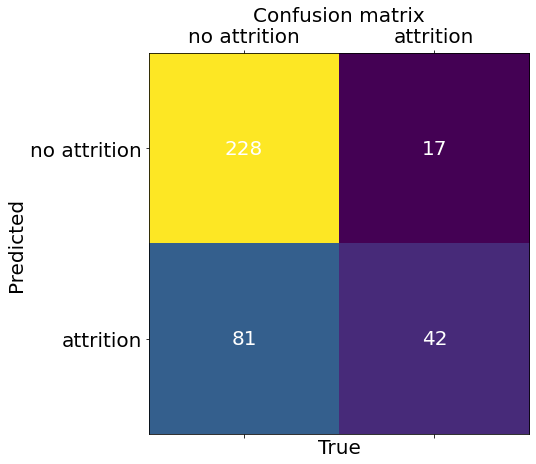

              precision    recall  f1-score   support

           0       0.93      0.74      0.82       309
           1       0.34      0.71      0.46        59

    accuracy                           0.73       368
   macro avg       0.64      0.72      0.64       368
weighted avg       0.84      0.73      0.77       368



In [47]:
draw_confusion(y_test,y_pred_test,['no attrition', 'attrition'],'SecondConfMatrix')
print (metrics.classification_report(y_test,y_pred_test))

In [48]:
values_of_machine_learning(y_test,y_pred_test)

sensitivity =  0.9306122448979591
specificity =  0.34146341463414637
pos. pred. val. =  0.7378640776699029
neg. pred. val. =  0.711864406779661
accuracy =  0.7336956521739131
F1_score =  0.4615384615384616


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
f1_score_number = f1_score(y_test, y_pred_test)
roc_auc_number = roc_auc_score(y_test, y_pred_test)

print("F1_score", f1_score_number*100)
print("AUC number",roc_auc_number)

F1_score 46.15384615384616
AUC number 0.724864242224782
